# P7_03_MODELISATION

# IMPORT

In [1]:
import math
import pandas as pd
import numpy as np
import re
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
import random
import gc
import os
import pickle
import joblib

In [2]:
# loading the trained model

classifier = joblib.load('final_model_lgbm.pkl')

C:\Users\marie\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\marie\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\marie\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\marie\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at yo

In [3]:
! pip install imblearn

In [4]:
!pip install lightgbm

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# CHARGEMENT DES DONNEES

In [6]:
os.getcwd()

'C:\\Users\\marie\\OPC\\P7'

In [7]:
app_df = pd.read_csv("C:\\Users\\marie\\OPC\\P7/app_train_features.csv")


In [8]:
app_df.head(1)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYP

# FEATURES SELECTION
Le but est d'éliminer un certain nombre de variables afin d'accélérer l'entrainement et la prédiction de nos modèles. Nous souhaitons éliminer les variables qui pénaliseront le moins possible les performances de nos modèles.

Nous savons déjà que les colonnes suivantes n'apportent pas d'information:
SK_ID_CURR (simple identifiant sans sens métier)  
FLAG_MOBIL (vaut toujours 1)  
Unnamed:0  
TARGET_y  
les colonnes contenant 'GENDER' apporte un biais lié au genre  

Nous pouvons les éliminer

In [9]:
# Let's drop the features that are not useful for the prediction
cols_todrop =["SK_ID_CURR", "FLAG_MOBIL", "CODE_GENDER_M", "CODE_GENDER_F", "CODE_GENDER_XNA", 'Unnamed: 0']
app_df = app_df.drop(columns=cols_todrop)


# SAMPLING

In [10]:
# Afin de travailler plus vite je fais un échantillinage
data_sample = app_df.sample(10000, random_state=42)

# SEPARATION DES DONNEES TRAIN_TEST_SPLIT
Nous allons transformer les données pour que nos modèles puissent les exploiter au mieux. Afin d'éviter la "fuite d'information" entre le jeu de données d'entraînement et de test, nous allons maintenant séparer notre jeu de données en deux. Les transformations seront apprises uniquement sur le jeu d'entraînement, mais appliquées aux deux jeux de données (entraînement et test).

In [11]:
# Given data
X = data_sample.drop(["TARGET"], axis=1)
# Data to predict
y = data_sample["TARGET"]

# Let's split the whole dataset into a training set (80% of data) and a test set (20% of data)
# The dataset will be split in a stratified way, in order to have a good distribution of the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


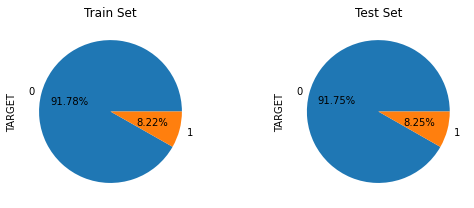

In [12]:
# Display proportion of target value in both train and eval set
fig, ax = plt.subplots(1,2, figsize=(8,4))
y_train.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], title='Train Set')
y_test.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], title='Test Set')
fig.subplots_adjust(wspace=0.5)

# CRÉATION MÉTRIQUE - FONCTION DE COÛT PROPRES
Dans notre cas, il est important de pénaliser les faux positifs bien plus que les faux négatifs.

Nous allons donc créer une fonction de coût - métrique spécifique à notre problème de classification qui doit permettre de minimiser le risque pour la banque.

Utiliser une fonction coût métier (par exemple, un faux négatif coûte 10 fois plus qu'un faux positif) dans la détermination du seuil de probabilité qui distingue les négatifs des positifs : trouver le minimum de ce coût en fonction du seuil. Voir si https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html est pertinent, sinon coder une fonction personnalisée qui prend comme arguments y_true et et y_pred (calculé en fonction d'un seuil) et qui rend un coût à partir de la matrice de confusion. 

In [13]:
def bank_score(y_true, y_pred):
    
    (TN, FP, FN, TP) = confusion_matrix(y_true, y_pred).ravel()
    N = TN + FP    # total negatives cases
    P = TP + FN    # total positives cases
    
    # We set the bank's gain and loss for each case
    FN_value = -10   # The loan is granted but the customer defaults (Type-II Error) 
    TN_value = 1     # The loan is reimbursed
    TP_value = 0     # The loan is (rightly) refused
    FP_value = -1    # Loan is refused by mistake (Type-I Error)

    # calculate total gains
    gain = TP*TP_value + TN*TN_value + FP*FP_value + FN*FN_value
    
    # best score : all observations are correctly predicted
    best = N*TN_value + P*TP_value 

    # baseline : all observations are predicted = 0
    baseline = N*TN_value + P*FN_value 
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain - baseline) / (best - baseline)
    
    return score

In [14]:
custom_score = make_scorer(bank_score)

# PRÉPROCESSING
L'analyse exploratoire a permis de mettre en lumière :

Un certain nombre de valeurs manquantes  
Le caractère déséquilibré du jeu de données : 91,68% des prêts ont été remboursés, contre seulement 8,33% de prêts non remboursés dans le jeu de données.  

3 approches sont possibles dans ce cas :  

Undersampling : supprimer des observations de la classe majoritaire afin de rééquilibrer le jeu  
Oversampling : répéter des observations de la classe minoritaire afin de rééquilibrer le jeu  
weight_balanced : indiquer au modèle le déséquilibre afin qu'il en tienne compte directement  

Nous allons utiliser ces 3 approches et comparer les résultats pour l'ensemble des modèles.  

### IMPUTATION DES VALEURS MANQUANTES

In [15]:
for col in X_train.columns:
    m = X_train.loc[X_train[col] != np.inf, col].max()
    X_train[col].replace(np.inf,m,inplace=True)
    X_test[col].replace(np.inf,m,inplace=True)

for col in X_train.columns:
    m = X_train.loc[X_train[col] != -np.inf, col].min()
    X_train[col].replace(-np.inf,m,inplace=True)
    X_test[col].replace(-np.inf,m,inplace=True)


C:\Users\marie\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [17]:
# Fit on the training data
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [18]:
# Transform training data
X_train_preproc = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
X_test_preproc = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

### NORMALISATION DES DONNEES
Afin d'éviter que certains modèles pondèrent l'importance de certaines variables à cause de leur ordre de grandeur, nous allons normaliser chaque variable afin de les ramener à une moyenne nulle et une variance de 1.

In [19]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

In [20]:
# Repeat with the scaler, fit imputer on train data only, to avoid data lea
scaler.fit(X_train_preproc)
X_train_preproc = scaler.transform(X_train_preproc)
X_test_preproc = scaler.transform(X_test_preproc)

In [21]:
xtrain = pd.DataFrame(scaler.transform(X_train_preproc), 
                      index=X_train.index, 
                      columns=X_train.columns)

xtest = pd.DataFrame(scaler.transform(X_test_preproc), 
                     index=X_test.index, 
                     columns=X_test.columns)

### STRATÉGIE DE RÉÉQUILIBRAGE

Comme nous l'avons vu, nos classes de TARGET sont largement déséquilibrées, ce qui va introduire un fort biais dans l'apprentissage de nos modèles. Nous allons donc ré-équilibrer ces classes dans nos jeux d'apprentissage afin de palier à ce problème.

L'algorithme utilisé va dans éliminer aléatoirement des individus de la classe majoritaire. D'autres algorithmes plus poussés permettent de générer plus de données de la classe sous-représentée (SMOTE: Synthetic Minority Over-sampling Technique), puis éliminer certains individus de la classe sur-représentées (ENN : Edited Nearest Neighbours), tout en optimisant les données d'apprentissage.

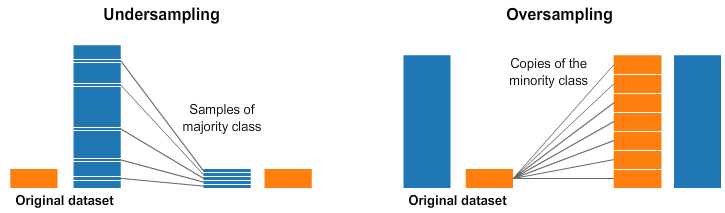

### Undersampling

In [22]:
rus = RandomUnderSampler(random_state=6)

In [23]:
# The standard dataset
xtrain_us_std, ytrain_us_std = rus.fit_resample(X_train, y_train)

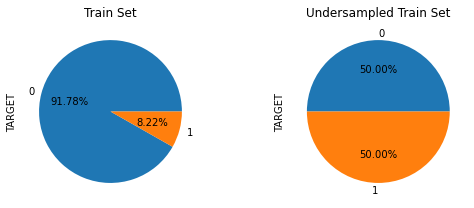

In [24]:
# Display proportion of target value in both train and eval set
fig, ax = plt.subplots(1,2, figsize=(8,4))
y_train.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], title='Train Set')
ytrain_us_std.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], title='Undersampled Train Set')
fig.subplots_adjust(wspace=0.5)

In [25]:
# The imputed and scaled dataset
xtrain_us, ytrain_us = rus.fit_resample(xtrain, y_train)

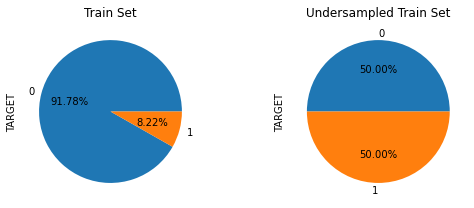

In [26]:
# Display proportion of target value in both train and eval set
fig, ax = plt.subplots(1,2, figsize=(8,4))
y_train.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], title='Train Set')
ytrain_us.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], title='Undersampled Train Set')
fig.subplots_adjust(wspace=0.5)

In [27]:
print("Le jeu de données undersampled contient {} observations, c'est-à-dire {} de moins que le jeu de données standard, soit {:1.2f}% de moins."\
      .format(len(ytrain_us), len(y_train)-len(ytrain_us), (len(y_train)-len(ytrain_us))/len(y_train)*100))

Le jeu de données undersampled contient 1316 observations, c'est-à-dire 6684 de moins que le jeu de données standard, soit 83.55% de moins.


### Oversampling
- Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

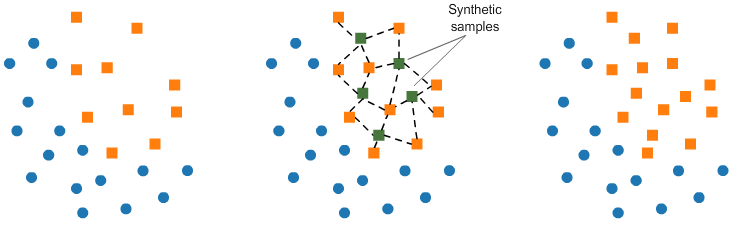

In [28]:
smote = SMOTE(random_state=6)
xtrain_os, ytrain_os = smote.fit_resample(xtrain, y_train)

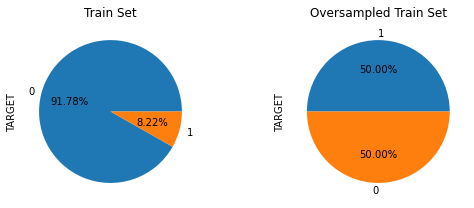

In [29]:
# Display proportion of target value in both train and eval set
fig, ax = plt.subplots(1,2, figsize=(8,4))
y_train.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], title='Train Set')
ytrain_os.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], title='Oversampled Train Set')
fig.subplots_adjust(wspace=0.5)

# CHOIX DE L'ALGORITHME
Afin de modéliser au mieux notre problème, nous allons comparer les performances de trois algorithmes :

* Régression Logistique  
* RandomForestClassifier  
* Light Gradient Boosting  
* Leurs performances seront comparées à celles d'une baseline naïve, un DummyClassifier.

In [30]:
results = pd.DataFrame(columns=["Algorithm", "Balancing Method",
                                "ROC AUC score", "ROC AUC score Test",
                                "Custom score", "Custom score test"])

## BASELINE : DUMMY CLASSIFIER

### Stratégie de rééquilibrage : aucune

In [31]:
def cv_score_sample(model, x, y, x_test, y_test, scoring, folds=5, loss_func=None):
    '''
        Uses cross-validation to determine the score of a model 
        on train data, then calculates the score on test data.
    
        Parameters
        --------
        - model     : a machine learning model
        - x         : pandas dataframe
                      The training features
        - y         : pandas dataframe
                      The training labels
        - x_test    : pandas dataframe
                      The test features
        - y_test    : pandas dataframe
                      The test labels
        - scoring   : Cost function
                      The cost function to use for scoring
        - folds     : int
                      The number of folds to use for the cross-validation
        - loss_func : Loss function
                      The loss function to use for the algorithms that allow
                      custom loss functions
            
        Returns
        --------
        -, -, -, - : tuple
                     - The training custom scores for each fold (array)
                     - The custom score for the test data (float)
                     - The training ROC AUC scores for each fold (array)
                     - The ROC AUC score for the test data (float)
    '''

    cv_custom_scores = []
    cv_ra_scores = []

    y_pred_proba = []

    # create folds
    kf = StratifiedKFold(n_splits=folds)
    
    for train_indices, valid_indices in kf.split(x, y):
        # Training data for the fold
        xtrn, ytrn = x.iloc[train_indices], y.iloc[train_indices]
        # Validation data for the fold
        xval, yval = x.iloc[valid_indices], y.iloc[valid_indices]

        # train
        if loss_func!=None:
            model.fit(xtrn, ytrn, eval_metric = loss_func)
        else:
            model.fit(xtrn, ytrn)

        # predict values on validation set
        ypred = model.predict(xval)
        
        # save probabilities for class 1
        yprob = model.predict_proba(xval)
        y_pred_proba+=(list(yprob[:,1]))

        # calculate and save scores
        ra_score = round(roc_auc_score(yval, ypred), 3)
        cv_ra_scores.append(ra_score)

        custom_score = round(scoring(yval, ypred), 3)
        cv_custom_scores.append(custom_score)

    if loss_func!=None:
        model.fit(x, y, eval_metric=loss_func)
        y_pred = model.predict(x_test)
    else:
        model.fit(x, y)
        y_pred = model.predict(x_test)

    ra_score_test = round(roc_auc_score(y_test, y_pred), 3)

    custom_score_test = round(scoring(y_test, y_pred), 3)

    return np.array(cv_custom_scores), \
           custom_score_test, \
           np.array(cv_ra_scores), \
           ra_score_test


In [32]:
bank_scores, bank_scores_test, roc_auc_scores, roc_auc_scores_test = cv_score_sample(DummyClassifier(strategy="most_frequent"), 
                                                                                        xtrain, 
                                                                                        y_train, 
                                                                                        xtest,
                                                                                        y_test,
                                                                                        bank_score)

In [33]:
row = ["Baseline", 
       "None",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : undersampling

In [34]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(DummyClassifier(strategy="most_frequent"), 
                                                         xtrain_us, 
                                                         ytrain_us, 
                                                         xtest,
                                                         y_test, 
                                                         bank_score)

In [35]:
row = ["Baseline", 
       "Undersampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : oversampling

In [36]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(DummyClassifier(strategy="stratified"), 
                                                         xtrain, 
                                                         y_train,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [37]:
row = ["Baseline", 
       "Oversampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### tratégie de rééquilibrage : class_weight="balanced"_
Ce paramètre n'existant pas explicitement pour le Dummy Classifier, nous allons simuler son utilisation en modifiant la stratégie en "stratified". Le Dummy Classifier va ainsi générer des prédictions en fonction de la distribution de la valeur à prédire.

In [38]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(DummyClassifier(strategy="stratified"), 
                                                         xtrain, 
                                                         y_train,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [39]:
row = ["Baseline", 
       "Balanced",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [40]:
results

,Algorithm,Balancing Method,ROC AUC score,ROC AUC score Test,Custom score,Custom score test
0,Baseline,None,0.5000,0.500,0.0000,0.000
1,Baseline,Undersampling,0.5000,0.500,0.3192,0.000
2,Baseline,Oversampling,0.4976,0.515,-0.1094,-0.076
3,Baseline,Balanced,0.4924,0.535,-0.1246,-0.022


## REGRESSION LOGISTIQUE

In [41]:
# Make the model with the specified regularization parameter
LR = LogisticRegression(C = 0.0001)
LR_balanced = LogisticRegression(C=0.0001, class_weight="balanced")

### Stratégie de rééquilibrage : aucune

In [42]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(LR, 
                                                         xtrain, 
                                                         y_train,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [43]:
row = ["LR", 
       "None",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : undersampling

In [44]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(LR, 
                                                         xtrain_us, 
                                                         ytrain_us,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [45]:
row = ["LR", 
       "Undersampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : oversampling

In [46]:
bbank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(LR, 
                                                         xtrain_os, 
                                                         ytrain_os,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [47]:
row = ["LR", 
       "Oversampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

###  Stratégie de rééquilibrage : class_weight='balanced'_

In [48]:
bbank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(LR, 
                                                         xtrain_os, 
                                                         ytrain_os,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [49]:
row = ["LR", 
       "Balanced",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [50]:
results

,Algorithm,Balancing Method,ROC AUC score,ROC AUC score Test,Custom score,Custom score test
0,Baseline,None,0.5000,0.500,0.0000,0.000
1,Baseline,Undersampling,0.5000,0.500,0.3192,0.000
2,Baseline,Oversampling,0.4976,0.515,-0.1094,-0.076
3,Baseline,Balanced,0.4924,0.535,-0.1246,-0.022
4,LR,None,0.5000,0.500,0.0000,0.000
5,LR,Undersampling,0.5792,0.552,0.5556,-0.554
6,LR,Oversampling,0.6442,0.602,0.5556,-0.273
7,LR,Balanced,0.6442,0.602,0.5556,-0.273


## RANDOM FOREST CLASSIFIER

In [51]:
# Make the random forest classifier
RF = RandomForestClassifier()

RF_balanced = RandomForestClassifier(n_estimators = 100, 
                                     random_state = 42, 
                                     verbose = 1, 
                                     n_jobs = -1, 
                                     class_weight="balanced")

### Stratégie de rééquilibrage : aucune

In [52]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(RF, 
                                                         xtrain, 
                                                         y_train,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [53]:
row = ["RF", 
       "None",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : undersampling

In [54]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(RF, 
                                                         xtrain_us, 
                                                         ytrain_us,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [55]:
row = ["RF", 
       "Undersampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

### Stratégie de rééquilibrage : oversampling

In [56]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(RF, 
                                                         xtrain_os, 
                                                         ytrain_os,  
                                                         xtest,
                                                         y_test,
                                                         bank_score)

In [57]:
row = ["RF", 
       "Oversampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [58]:
results

,Algorithm,Balancing Method,ROC AUC score,ROC AUC score Test,Custom score,Custom score test
0,Baseline,None,0.5000,0.500,0.0000,0.000
1,Baseline,Undersampling,0.5000,0.500,0.3192,0.000
2,Baseline,Oversampling,0.4976,0.515,-0.1094,-0.076
3,Baseline,Balanced,0.4924,0.535,-0.1246,-0.022
4,LR,None,0.5000,0.500,0.0000,0.000
5,LR,Undersampling,0.5792,0.552,0.5556,-0.554
6,LR,Oversampling,0.6442,0.602,0.5556,-0.273
7,LR,Balanced,0.6442,0.602,0.5556,-0.273
8,RF,None,0.5000,0.500,-0.0008,0.000
9,RF,Undersampling,0.6238,0.653,0.5214,-0.127


## LIGHT GRADIENT BOOSTING
Le modèle Light Gradient Boosting Machine fonctionne avec des valeurs manquantes et est invariant à l'échelle. Les données sans preprocessing peuvent donc être utilisées.

In [59]:
X_train_model = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
xtrain_us_std_model = xtrain_us_std.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [60]:
X_test_model = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [61]:
# Create the model
lgbm_model = lgb.LGBMClassifier(n_estimators=10000, 
                                objective = 'binary', 
                                learning_rate = 0.05, 
                                reg_alpha = 0.1, 
                                reg_lambda = 0.1, 
                                subsample = 0.8, n_jobs = -1, 
                                random_state = 42)

lgbm_model_balanced = lgb.LGBMClassifier(n_estimators=10000, 
                                         objective = 'binary', 
                                         class_weight = 'balanced', 
                                         learning_rate = 0.05, 
                                         reg_alpha = 0.1, 
                                         reg_lambda = 0.1, 
                                         subsample = 0.8, 
                                         n_jobs = -1, 
                                         random_state = 42)

 #### Stratégie de rééquilibrage : aucune

In [62]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model, 
                                                         X_train_model, 
                                                         y_train,  
                                                         X_test_model,
                                                         y_test,
                                                         bank_score, 
                                                         2, 
                                                         loss_func="roc_auc")

In [63]:
row = ["LGBM - ROC AUC", 
       "None",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [64]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model, 
                                                         X_train_model, 
                                                         y_train,  
                                                         X_test_model,
                                                         y_test,
                                                         bank_score, 
                                                         5, 
                                                         loss_func=custom_score)

In [65]:
row = ["LGBM - BANK SCORE", 
       "None",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

#### Stratégie de rééquilibrage : undersampling

In [66]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model, 
                                                         xtrain_us_std_model, 
                                                         ytrain_us_std, 
                                                         X_test_model,
                                                         y_test,
                                                         bank_score, 
                                                         5, 
                                                         loss_func="roc_auc")

In [67]:
row = ["LGBM - ROC AUC", 
       "Undersampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [68]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model, 
                                                         xtrain_us_std_model, 
                                                         ytrain_us_std, 
                                                         X_test_model,
                                                         y_test,
                                                         bank_score, 
                                                         5, 
                                                         loss_func=custom_score)

In [69]:
row = ["LGBM - BANK SCORE", 
       "Undersampling",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

#### Stratégie de rééquilibrage : oversampling
Ce n'est pas possible pour un jeu de données contenant des données manquantes.

In [70]:
row = ["LGBM - ROC AUC", 
       "Oversampling",
       "NA",
       "NA",
       "NA", 
       "NA"]

results.loc[len(results)] = row

In [71]:
row = ["LGBM - CUSTOM SCORE", 
       "Oversampling",
       "NA",
       "NA",
       "NA", 
       "NA"]

results.loc[len(results)] = row

#### Stratégie de rééquilibrage : class_weight='balanced'_

In [72]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model_balanced, 
                                                         X_train_model, 
                                                         y_train,  
                                                         X_test_model,
                                                         y_test,
                                                         bank_score, 
                                                         5, 
                                                         loss_func="roc_auc")

In [73]:
row = ["LGBM - ROC AUC", 
       "Balanced",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

In [74]:
bank_scores, bank_scores_test, \
roc_auc_scores, roc_auc_scores_test = cv_score_sample(lgbm_model_balanced, 
                                                         X_train_model, 
                                                         y_train, 
                                                         X_test_model,
                                                         y_test, 
                                                         bank_score, 
                                                         5, 
                                                         loss_func=custom_score)

In [75]:
row = ["LGBM - BANK SCORE", 
       "Balanced",
       roc_auc_scores.mean(), 
       roc_auc_scores_test,
       bank_scores.mean(),
       bank_scores_test]

results.loc[len(results)] = row

## COMPARAISON DES PERFORMANCES

In [76]:
results

,Algorithm,Balancing Method,ROC AUC score,ROC AUC score Test,Custom score,Custom score test
0,Baseline,None,0.5,0.5,0.0,0.0
1,Baseline,Undersampling,0.5,0.5,0.3192,0.0
2,Baseline,Oversampling,0.4976,0.515,-0.1094,-0.076
3,Baseline,Balanced,0.4924,0.535,-0.1246,-0.022
4,LR,None,0.5,0.5,0.0,0.0
5,LR,Undersampling,0.5792,0.552,0.5556,-0.554
6,LR,Oversampling,0.6442,0.602,0.5556,-0.273
7,LR,Balanced,0.6442,0.602,0.5556,-0.273
8,RF,None,0.5,0.5,-0.0008,0.0
9,RF,Undersampling,0.6238,0.653,0.5214,-0.127
